# Load Data

In [11]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the root folder to python path
sys.path.append(os.path.abspath("../"))

from src.config import NUM_FEATURES, CAT_FEATURES, TARGET

loan_file_path = "../data/raw/Loan_Default.csv"
loan_data = pd.read_csv(loan_file_path, encoding='Windows-1252')

loan_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Dataset overview 

In [2]:
# the shape of the datastet number of rows and columns
loan_data.shape

(255347, 18)

In [3]:
# Give a summary of the DataFrame ( Index Range, Column names and data types, Non-null count for each column - helps detect missing values, show how much memor the DataFrame consumes )
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

# Target analysis

In [4]:
# Absolute counts
print(loan_data["Default"].value_counts())

# Percentages
print(loan_data["Default"].value_counts(normalize=True) * 100)

Default
0    225694
1     29653
Name: count, dtype: int64
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64


# Missing values

In [5]:
""" 
We will learn:
- Which features need imputation
- Whether to drop any features
"""
loan_data.isnull().mean().sort_values(ascending=False)

LoanID            0.0
Age               0.0
HasCoSigner       0.0
LoanPurpose       0.0
HasDependents     0.0
HasMortgage       0.0
MaritalStatus     0.0
EmploymentType    0.0
Education         0.0
DTIRatio          0.0
LoanTerm          0.0
InterestRate      0.0
NumCreditLines    0.0
MonthsEmployed    0.0
CreditScore       0.0
LoanAmount        0.0
Income            0.0
Default           0.0
dtype: float64

# Feature understanding

In [6]:
# Separate feature into : numerical and categorical
num_cols = loan_data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = loan_data.select_dtypes(include=["object"]).columns

## Summary statistics for numeric columns

In [7]:
# Describe
loan_data[num_cols].describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## Summary statistics for categorical columns

In [8]:
loan_data[cat_cols].describe()

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


# Visualization

## For the target

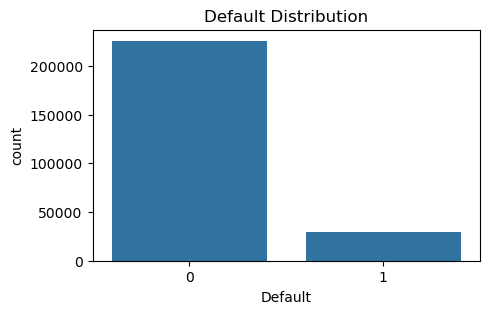

In [9]:
# Bar plot for target variable
plt.figure(figsize=(5,3))
sns.countplot(x=TARGET, data=loan_data)
plt.title(f"{TARGET} Distribution")
plt.show()

## For the numeric features

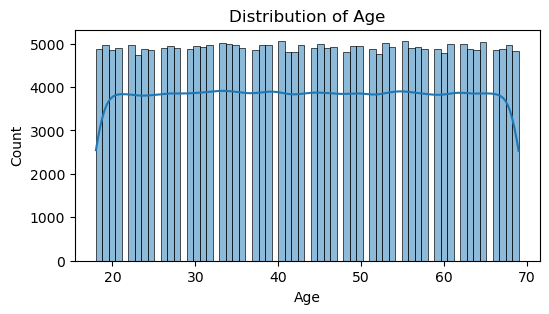

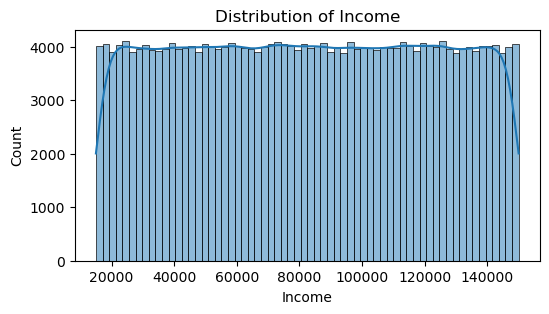

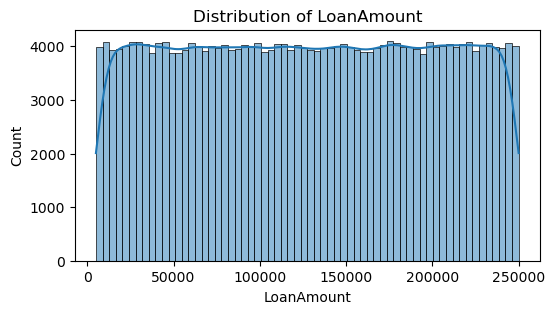

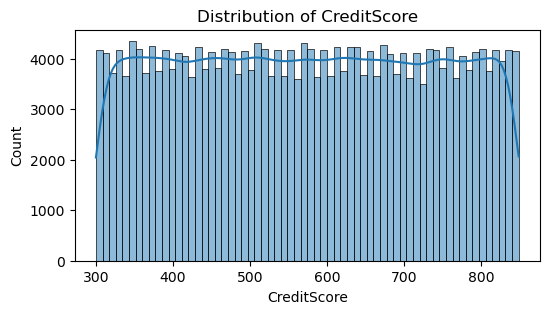

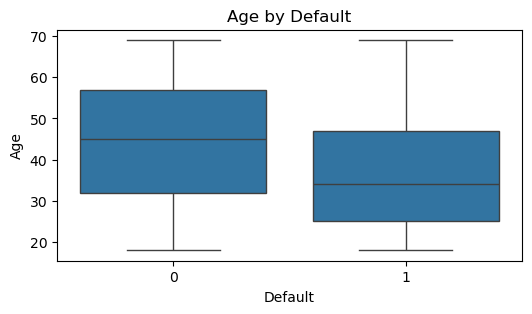

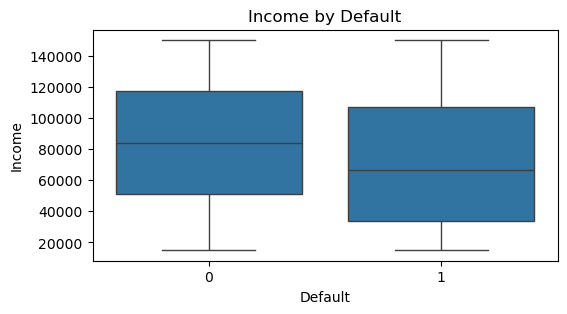

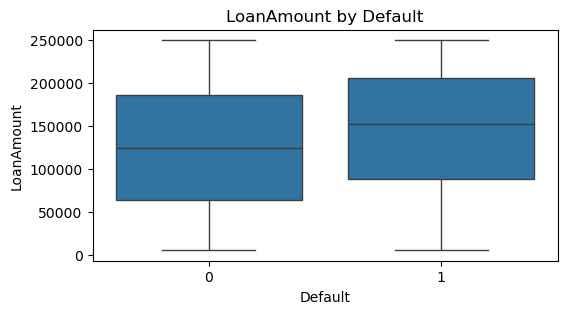

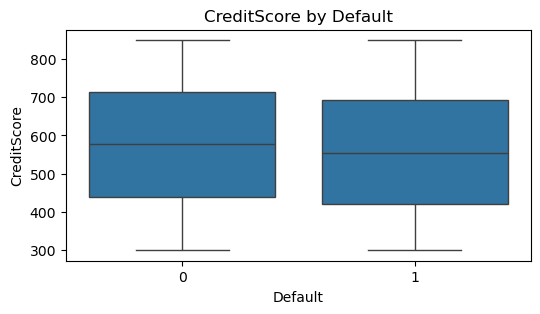

In [12]:
#Histograms
for col in NUM_FEATURES:
    plt.figure(figsize=(6, 3))
    sns.histplot(loan_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots by target (optional but useful)
for col in NUM_FEATURES:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=TARGET, y=col, data=loan_data)
    plt.title(f"{col} by {TARGET}")
    plt.show()

## For the categorical features

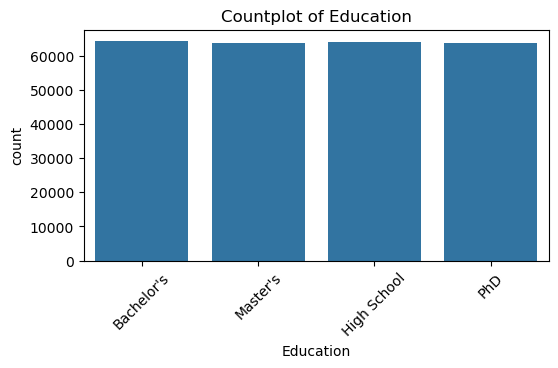

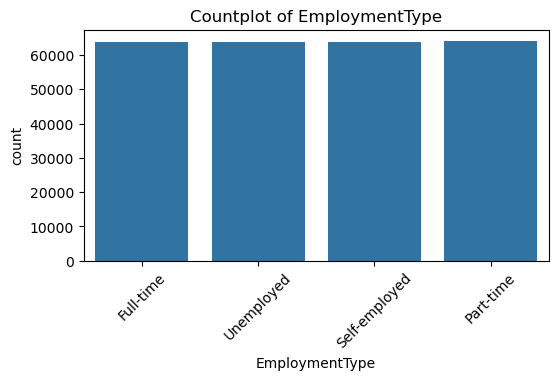

In [13]:
# Countplots
for col in CAT_FEATURES:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=loan_data)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

## For the correlation heatmap

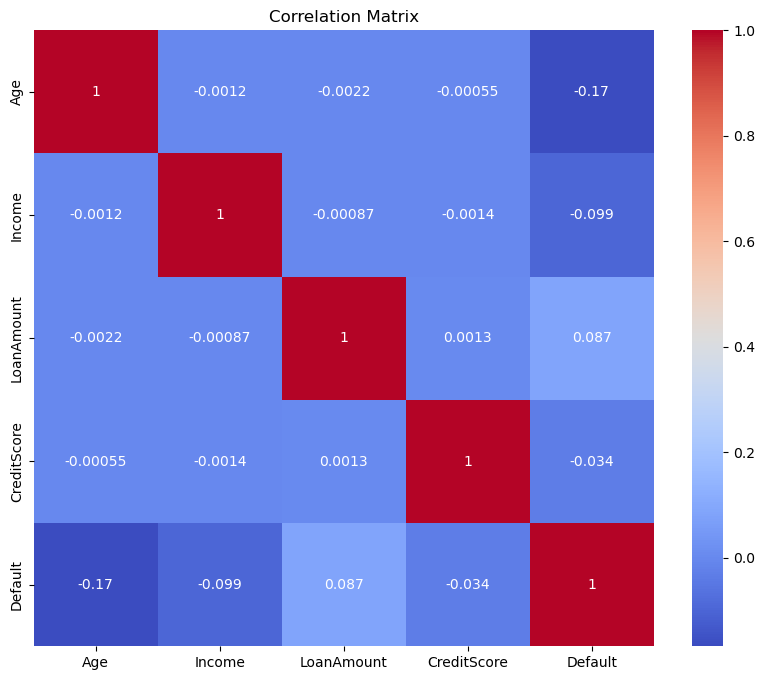

In [14]:
# Correlation heatmap (numeric + target)
plt.figure(figsize=(10, 8))
sns.heatmap(loan_data[NUM_FEATURES + [TARGET]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Insights for modeling

- Target: "Default' (imbalanced ~11.7% positve class, ~88.3% negative class)
- Numerical features :
    - Age
    - Income
    - Loan_amount
    - CreditScore
- Categorical features
    - Education
    - EmploymentType
- Missing values: No missing values 
  
- Evaluation metric: ROC-AUC 